In [3]:
from google.colab import drive
drive.mount('/content/drive')
root_path = 'drive/My Drive/'

Mounted at /content/drive


In [4]:
%cd drive/My Drive

/content/drive/My Drive


The code below imports the Numpy arrays of the training and testing dataset and passes it through the CNN classifier.
The testing data is also passed through the model to and predicted.

In [17]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation,Flatten,Conv2D,MaxPooling2D
import pickle
from sklearn.model_selection import train_test_split

X = np.load('genre_features.npy')
Y = np.load('genre_labels.npy')
X=np.expand_dims(np.array(X),axis=2)
print(X.shape)


(999, 36, 1, 1)


In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
labels=np.argmax(Y, axis=1)
print(labels)


(799, 36, 1, 1)
(799, 10)
(200, 36, 1, 1)
(200, 10)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4

In [29]:
import tensorflow as tf
import keras
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import pyplot
from keras.preprocessing import image
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten
from tensorflow.python.keras.layers import Conv2D, MaxPooling1D, Input, concatenate, BatchNormalization, Conv1D, AveragePooling1D

model = Sequential()
model.add(Conv1D(256, 5,activation='relu', input_shape=(36,1)))
model.add(BatchNormalization())
model.add(AveragePooling1D(pool_size=2))


model.add(Conv1D(128, 3, activation='relu'))
model.add(BatchNormalization())
model.add(AveragePooling1D(pool_size=2))


model.add(Conv1D(64, 3, activation='relu'))
model.add(AveragePooling1D(pool_size=2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 32, 256)           1536      
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 256)           1024      
_________________________________________________________________
average_pooling1d_6 (Average (None, 16, 256)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 14, 128)           98432     
_________________________________________________________________
batch_normalization_6 (Batch (None, 14, 128)           512       
_________________________________________________________________
average_pooling1d_7 (Average (None, 7, 128)            0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 5, 64)           

In [16]:
history =model.fit(x_train, y_train, epochs=500, verbose=1,validation_data=(x_test, y_test) )
model.save('speech_genre.model')

Epoch 1/500
25/25 [==============================] - 1s 34ms/step - loss: 2.2480 - accuracy: 0.1652 - val_loss: 5.3507 - val_accuracy: 0.1050
Epoch 2/500
25/25 [==============================] - 1s 24ms/step - loss: 2.1412 - accuracy: 0.1802 - val_loss: 4.1375 - val_accuracy: 0.1050
Epoch 3/500
25/25 [==============================] - 1s 24ms/step - loss: 2.0539 - accuracy: 0.2040 - val_loss: 3.6059 - val_accuracy: 0.1050
Epoch 4/500
25/25 [==============================] - 1s 23ms/step - loss: 1.9739 - accuracy: 0.2603 - val_loss: 3.4420 - val_accuracy: 0.1050
Epoch 5/500
25/25 [==============================] - 1s 23ms/step - loss: 1.9053 - accuracy: 0.2904 - val_loss: 2.6864 - val_accuracy: 0.1250
Epoch 6/500
25/25 [==============================] - 1s 23ms/step - loss: 1.9002 - accuracy: 0.2991 - val_loss: 2.4035 - val_accuracy: 0.1300
Epoch 7/500
25/25 [==============================] - 1s 23ms/step - loss: 1.8618 - accuracy: 0.3217 - val_loss: 2.5674 - val_accuracy: 0.1300
Epoch 

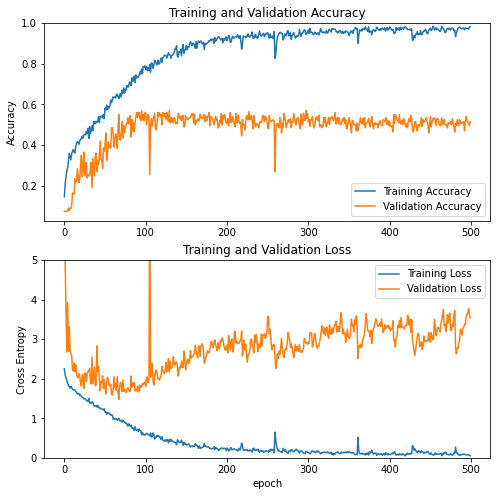

In [7]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,5.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [8]:
model = tf.keras.models.load_model("speech_genre.model")
loss, accuracy = model.evaluate(x_test,y_test)
print('Test accuracy :', accuracy)

7/7 [==============================] - 0s 5ms/step - loss: 3.5358 - accuracy: 0.5150
Test accuracy : 0.5149999856948853


In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
#Retrieve a batch of images from the test set
predictions = model.predict(x_test)
# Apply a sigmoid since our model returns logits
#print(predictions)
predictions =np.argmax(predictions, axis=1)
labels=np.argmax(y_test, axis=1)


print('Predictions:\n', predictions)
print('Labels:\n', labels)


cm=confusion_matrix(labels,predictions)
print(cm)

f=f1_score(labels,predictions,average=None)
print('f1 score:',f)

Predictions:
 [8 4 8 3 8 3 8 4 0 8 2 3 6 7 7 0 3 5 0 8 8 2 0 4 4 2 8 4 7 6 2 3 8 4 8 7 8
 5 1 8 7 4 0 8 9 0 8 6 1 0 3 4 4 8 9 1 6 8 2 7 0 1 3 4 0 3 8 3 2 4 6 5 5 8
 1 1 7 3 0 8 3 9 4 2 5 2 7 2 8 0 9 3 6 1 5 0 2 9 0 7 0 4 7 2 9 0 0 8 3 2 7
 9 4 8 6 3 9 9 1 3 0 1 3 5 0 1 0 6 2 2 0 1 8 7 2 4 8 7 6 4 3 3 4 0 5 3 2 5
 4 3 5 2 5 1 5 2 5 6 2 0 9 4 1 3 0 6 3 3 6 4 7 0 7 8 3 7 9 2 6 6 1 1 9 2 5
 5 0 8 0 7 8 4 4 6 1 3 2 8 1 2]
Labels:
 [9 4 8 3 8 3 5 4 0 9 8 3 6 7 7 0 3 5 0 6 7 5 4 9 4 9 8 4 7 7 9 3 0 6 0 7 2
 6 1 8 2 4 2 6 9 3 8 6 2 6 2 4 1 6 5 7 6 6 2 7 8 1 3 0 1 3 9 3 2 8 6 5 9 8
 0 9 7 3 5 9 3 0 4 1 9 2 7 2 1 0 5 1 1 1 5 4 2 5 8 7 0 4 7 3 9 6 0 8 3 2 2
 9 9 1 7 3 9 9 7 3 0 5 3 0 0 1 1 1 2 2 8 7 4 9 1 1 1 7 6 4 3 5 8 3 9 3 2 5
 6 3 6 2 5 7 5 2 5 6 2 0 1 4 3 3 0 9 0 1 5 4 7 6 7 8 7 7 2 0 6 1 0 5 3 2 5
 5 2 6 6 9 0 4 6 6 9 3 2 8 6 3]
[[10  2  1  1  1  1  0  0  3  1]
 [ 2  4  2  2  2  0  3  0  3  1]
 [ 2  1 14  1  0  0  0  2  1  1]
 [ 2  1  2 19  0  0  0  0  0  1]
 [ 2  0  0  0 12  0  0  0  1  0